#Import Libraries and Dataset

In [1]:
#Import Analysis Modules
from datetime import datetime
import time

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from numpy import nan, isnan, mean, std, hstack, ravel

from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, LeavePOut, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Binarizer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import tree, ensemble
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc, accuracy_score,mean_absolute_error, r2_score, roc_auc_score
from sklearn.svm import SVC

import scipy.stats as stats
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

#Import Visualization Modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
%matplotlib inline

#Import SciPy
from scipy.sparse import issparse

#Import warning
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';',na_values='nan',)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
rows, columns = data.shape
data.shape

(4898, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#Undeerstand the dataset

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


DescribeResult(nobs=4898, minmax=(3, 9), mean=5.87790935075541, variance=0.7843556854710506, skewness=0.15574868141362455, kurtosis=0.21508011570192975)


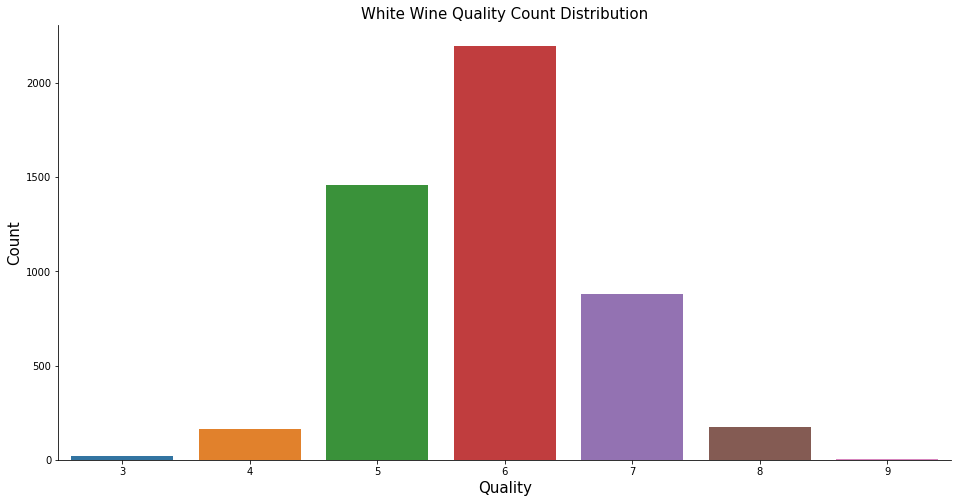

In [7]:
print(stats.describe(data['quality'])) #full descriptive statistics
#count distribution
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.countplot(x = 'quality', data = data)
ax.set_xlabel('Quality', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('White Wine Quality Count Distribution', fontsize=15)
sns.despine()
#most of the wine is in the middle group (5-6), which make the wine quality show normal distributiuon

In [8]:
#find out the quartile to understand the distribution
print('1º Quartile: ', data.quality.quantile(q = 0.25))
print('2º Quartile: ', data.quality.quantile(q = 0.50))
print('3º Quartile: ', data.quality.quantile(q = 0.75))
print('4º Quartile: ', data.quality.quantile(q = 1.00))
print('Ages above: ', data.quality.quantile(q = 0.75) + 
                      1.5*(data.quality.quantile(q = 0.75) - data.quality.quantile(q = 0.25)), 'are outliers')
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

1º Quartile:  5.0
2º Quartile:  6.0
3º Quartile:  6.0
4º Quartile:  9.0
Ages above:  7.5 are outliers


##Let's do some plots to understand the distrubution of wine quality with other feature in the datasets. 
> *Because wine termilogies are new for everyone, I set a short definiation to make everyone knows the basic feature variables*





Text(0.5, 1.0, 'pH in White Wine Quality')

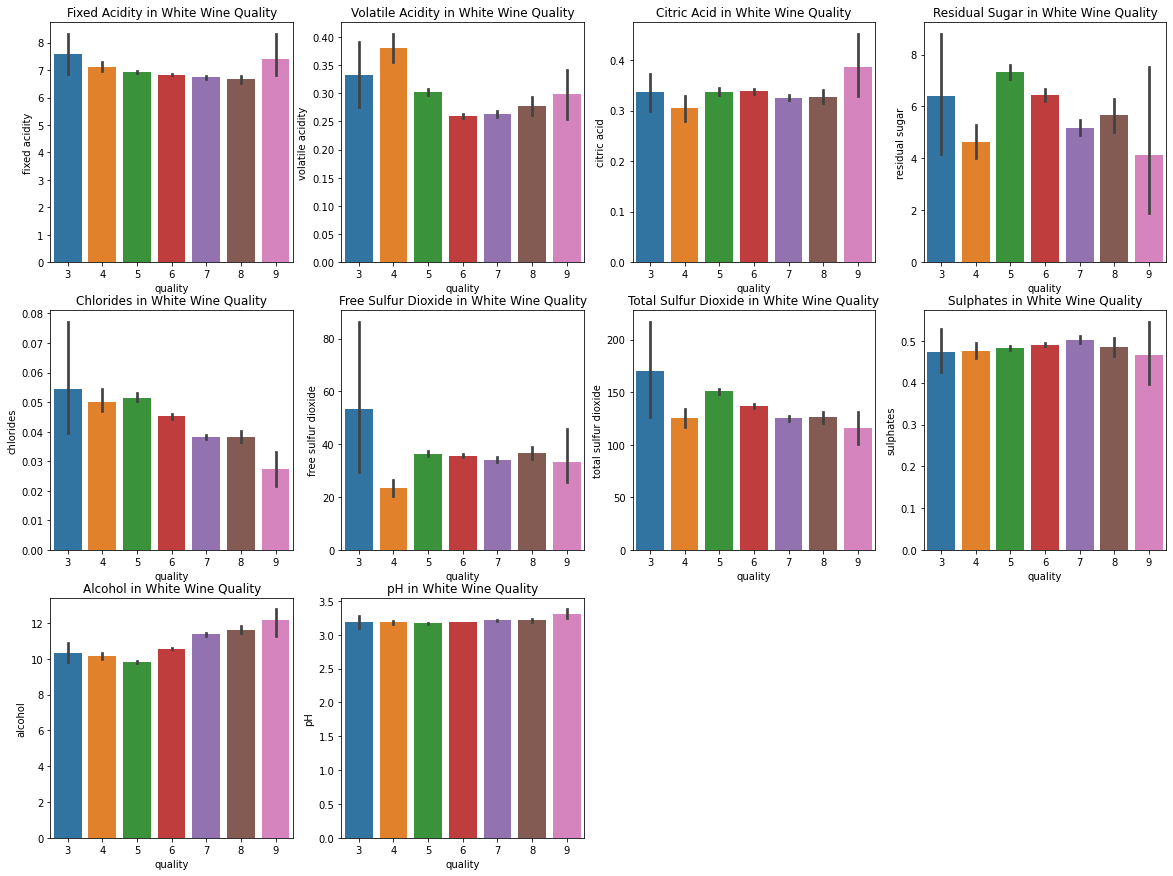

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)
plt.title('Fixed Acidity in White Wine Quality')

plt.subplot(3,4,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)
plt.title('Volatile Acidity in White Wine Quality')

plt.subplot(3,4,3)
sns.barplot(x = 'quality', y = 'citric acid', data = data)
plt.title('Citric Acid in White Wine Quality')

plt.subplot(3,4,4)
sns.barplot(x = 'quality', y = 'residual sugar', data = data)
plt.title('Residual Sugar in White Wine Quality')

plt.subplot(3,4,5)
sns.barplot(x = 'quality', y = 'chlorides', data = data)
plt.title('Chlorides in White Wine Quality')

plt.subplot(3,4,6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)
plt.title('Free Sulfur Dioxide in White Wine Quality')

plt.subplot(3,4,7)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)
plt.title('Total Sulfur Dioxide in White Wine Quality')

plt.subplot(3,4,8)
sns.barplot(x = 'quality', y = 'sulphates', data = data)
plt.title('Sulphates in White Wine Quality')

plt.subplot(3,4,9)
sns.barplot(x = 'quality', y = 'alcohol', data = data)
plt.title('Alcohol in White Wine Quality')

plt.subplot(3,4,10)
sns.barplot(x = 'quality', y = 'pH', data = data)
plt.title('pH in White Wine Quality')

1. Fixed Acidity
* The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  All of these acids originate in grapes with the exception of succinic acid, which is produced by yeast during the fermentation process
Grapes also contain ascorbic acid (Vitamin C), but this is lost during fermentation.  It is also legal to add fumaric acid as a preservative.
* According to the plot, Fixed acidity does not give any specification to classify the quality

2. Volatile acidity (VA)
* Volatile acidity (VA) is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.
* According to the plot, Volatile Acidity does not give any specification to classify the quality

3. Citric Acid 
* Citric Acid is most commonly used as an acid supplement during the fermentation process to help winemakers boost the acidity of their wine especially grapes grown in warmer climates. It can also be used as a stabiliser to prevent ferric hazes. The acid is used in the metabolic activity of several strains of bacteria which could lead to the increase of unwanted microbes.
* According to the plot, citric acid go higher as we go higher in the quality of the wine

4. Residual Sugar
* Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter.
* According to the plot, residual sugar in wine is variety

5. Chlorides
* chlorides may have a key role on a potential salty taste of a wine. chlorides is a major contributor to saltiness
* According to the plot, chloride also go down as we go higher in the quality of the wine

6. Sulfur Dioxide
* sulfur dioxide revents the wine from reacting with oxygen which can cause browning and off-odors (oxidation), and it inhibits the growth of bacteria and undesirable wild yeasts in the wine.
* Accoridng to the plot, free sulfur dioxide in wine is variety and total sulfur dioxide in wine is variety

7. Sulfites
* sulfites preserve freshness and protect wine from oxidation, and unwanted bacteria and yeasts
* Sulphates level does not give any specification to classify the quality

8. Alcohol
* Accodring to the plot, Alcohol level also goes higher as the quality of wine increases

9. pH
* Accodring to the plot, pH level does not give any specification to classify the quality

# Feature Engineering: Prepare data for performing Machine Learning Algorithm

In [10]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)


In [11]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
for col in data:
  if col in data.columns:
    i = data.columns.get_loc(col)
    data.iloc[:,i] = data.apply(lambda i:label_quality.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [12]:
data.quality.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

0    3838
1    1060
Name: quality, dtype: int64


Text(0, 0.5, '% of Wine status')

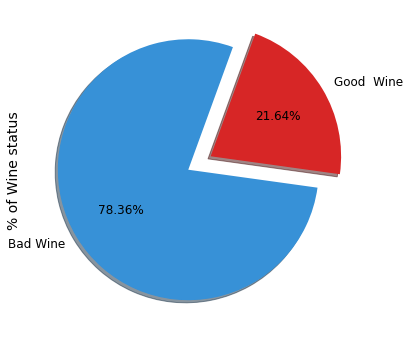

In [13]:
#Bad becomes 0, good becomes 1
data['quality'] = label_quality.fit_transform(data['quality'])
print(data['quality'].value_counts())

plt.figure(figsize=(12, 6))
colors = ["#3791D7", "#D72626"]
labels = "Bad Wine", "Good  Wine"
data["quality"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, labels=labels, fontsize=12, startangle=70)
plt.ylabel('% of Wine status', fontsize=14)


In [14]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('quality', axis = 1).to_numpy()
y = data['quality'].to_numpy()

In [15]:
#create validation dataset
validation = data.sample(frac=.2,random_state=500)
val_x = validation.drop('quality',axis=1)
val_y = validation['quality'].to_numpy()

In [16]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [17]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Machine Learning Algorithm

## Logistic Regression

In [18]:
# We create a LogisticRegression model object
#create parameter to find the best fit to the model 
parameters_LR = {
    "solver" : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    "penalty" : ('l1', 'l2', 'elasticnet', 'none'),
    "C" : [0.01, 0.1, 1, 10, 1000]}

# from scikit-learn module.
logreg = LogisticRegression()

#adding gridsearchCV to defind the best parameters
logreg_gridsearch = GridSearchCV(logreg, parameters_LR)

#fitting dataset
logreg_gridsearch.fit(X_train,y_train)

#finding the best parameter
best_log_model = logreg_gridsearch.best_params_

In [19]:
#print the best model 
best_log_model

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [20]:
#make a prediction on train dataset
log_predictions_test = logreg_gridsearch.predict(X_test)

#Print prediction
print("Predictions:",log_predictions_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",logreg_gridsearch.predict_proba(X_test))


Predictions: [0 0 0 0 0 0 0 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[0.7525529  0.2474471 ]
 [0.94002471 0.05997529]
 [0.98499722 0.01500278]
 ...
 [0.79680262 0.20319738]
 [0.7601233  0.2398767 ]
 [0.94927737 0.05072263]]


In [21]:
#testing over-fitting
print("Train Accuracy:",logreg_gridsearch.score(X_train, y_train))
print("Test Accuracy:",logreg_gridsearch.score(X_test, y_test))

Train Accuracy: 0.7963246554364471
Test Accuracy: 0.7938775510204081


The score of testing set and training set are very close which indicates that we avoided over-fitting.

In [22]:
#Let's see how our model performed on test dataset
print(classification_report(y_test, log_predictions_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       761
           1       0.70      0.14      0.23       219

    accuracy                           0.79       980
   macro avg       0.75      0.56      0.56       980
weighted avg       0.78      0.79      0.74       980



1.   For Precision
* there are 80% Bad Wine as the prediction correctly
* there are 70% Good Win as the prediction correctly 
2.   For Recall
* there are 98% positive Bad Wine cases that were catched
* there are 14% positive Good Win cases that were catched
3. For F1-score
* there are 88% Bad Wine of positive predictions were correct
* there are 23% Good Win of positive predictions were correct

4. Accuracy is 0.79

In [23]:
#get more information on the accuracy of the model with a confusion matrix
#create the confusion matrix
cm = confusion_matrix(y_test, log_predictions_test)

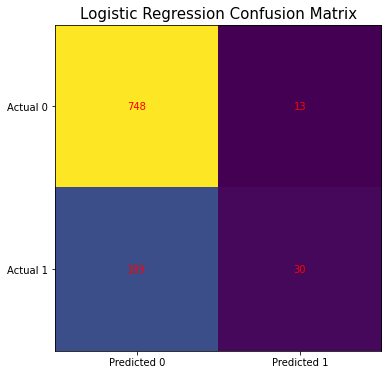

In [24]:
#visuallize the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_title('Logistic Regression Confusion Matrix', fontsize=15)

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

In [25]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, log_predictions_test)
roc_auc_log = auc(fp, tp)

Area under the ROC curve: 0.560


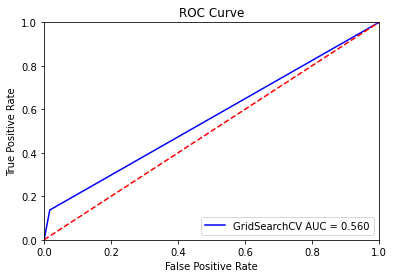

In [26]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='GridSearchCV AUC = %0.3f'% roc_auc_log)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_log))

In [27]:
#find the mean of auc score
mean_auc_log = mean(cross_val_score(logreg_gridsearch,X_test,y_test, cv=10, scoring='roc_auc'))
print("The mean of Logistic Regression's accuracy score is: {}".format(mean_auc_log))

The mean of Logistic Regression's accuracy score is: 0.7754320867102822


## K-Nearest Neighbor Classsifier

In [28]:
# We create a LogisticRegression model object
#create parameter to find the best fit to the model 
parameters_KNN = {
    "n_neighbors" : [2,5,7,15],
    "weights" : ('uniform','distance'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [1,2,5]}

# from scikit-learn module.
neighbors= KNeighborsClassifier(n_jobs=-1)

#adding gridsearchCV to defind the best parameters
knn_griddsearch= GridSearchCV(neighbors, parameters_KNN)

# fit method estimates the coefficients
knn_griddsearch.fit(X_train,y_train)

##finding the best parameter
best_knn_model= knn_griddsearch.best_params_

In [29]:
#print the best model
best_knn_model

{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

In [30]:
#make a prediction on test dataset
neighbors_predictions_test = knn_griddsearch.predict(X_test)

#Print prediction
print("Predictions:",neighbors_predictions_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",knn_griddsearch.predict_proba(X_test))


Predictions: [0 0 0 0 0 0 0 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[1.         0.        ]
 [1.         0.        ]
 [0.88756052 0.11243948]
 ...
 [0.86052224 0.13947776]
 [0.85331645 0.14668355]
 [0.93659414 0.06340586]]


In [31]:
#test overfiting
print("Train Accuracy: {}".format(knn_griddsearch.score(X_train, y_train)))
print("Test Accuracy: {}".format(knn_griddsearch.score(X_test, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8469387755102041


The score of testing set and training set are different. Let's adjust the model to make sure there is no over fitting.

In [36]:
#neighbors
neighbors = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5 )

#fit datasets
neighbors.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
#make a prediction on test dataset
neighbors_predictions_test = neighbors.predict(X_test)

#Print prediction
print("Predictions:",neighbors_predictions_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",neighbors.predict_proba(X_test))


Predictions: [0 0 0 0 0 0 1 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 ...
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


In [38]:
#test overfiting
print("Train Accuracy: {}".format(neighbors.score(X_train, y_train)))
print("Test Accuracy: {}".format(neighbors.score(X_test, y_test)))

Train Accuracy: 0.8869321082184788
Test Accuracy: 0.8051020408163265


Train and test dataset have a better score, which indicate that it's not over fitting. Let's keep the model to analysis further

In [41]:
#Let's see how our model performed
print(classification_report(y_test, neighbors_predictions_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       761
           1       0.58      0.47      0.52       219

    accuracy                           0.81       980
   macro avg       0.72      0.69      0.70       980
weighted avg       0.79      0.81      0.80       980



1.   For Precision
* there are 86% Bad Wine as the prediction correctly
* there are 58% Good Win as the prediction correctly 
2.   For Recall
* there are 90% positive Bad Wine cases that were catched
* there are 47% positive Good Win cases that were catched
3. For F1-score
* there are 88% Bad Wine of positive predictions were correct
* there are 52% Good Win of positive predictions were correct

4. Accuracy is 0.81

In [42]:
#get more information on the accuracy of the model with a confusion matrix
#create the confusion matrix
cm = confusion_matrix(y_test, neighbors_predictions_test)

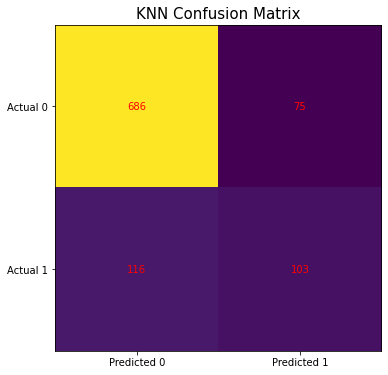

In [43]:
#visuallize the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_title('KNN Confusion Matrix', fontsize=15)

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

In [44]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, neighbors_predictions_test)
roc_auc_knn = auc(fp, tp)

Area under the ROC curve: 0.686


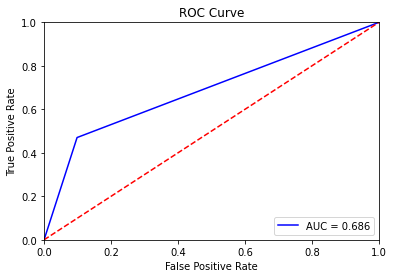

In [45]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.3f'% roc_auc_knn)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print('Area under the ROC curve: {:.3f}'.format(roc_auc_knn))

In [46]:
#find the mean of auc score
mean_auc_knn = mean(cross_val_score(neighbors,X_test,y_test, cv=10, scoring='roc_auc'))
print("The mean of KNN classifier's accuracy score is: {}".format(mean_auc_knn))

The mean of KNN classifier's accuracy score is: 0.7115593366533216


## Decision Tree Classifier Model

In [47]:
#We create a Decision TRee Classifier model object
#Create parameter to find the best fit to the model
parameters_DT = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2')}
## Create estimator
dtc = DecisionTreeClassifier()

#adding GridsearchCV to define the best parameter
dtc_gridsearch = GridSearchCV(dtc, parameters_DT)

## Fit the model using training set 
dtc_gridsearch.fit(X_train,y_train)

#Fiding the best parameter
best_dtc_model = dtc_gridsearch.best_params_

In [48]:
#print the best model
best_dtc_model

{'criterion': 'entropy', 'max_features': 'log2'}

In [49]:
#Prediction
dtc_prediction_test = dtc_gridsearch.predict(X_test)

#Print prediction
print("Predictions:",dtc_prediction_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",dtc_gridsearch.predict_proba(X_train))


Predictions: [0 0 0 0 0 0 0 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [50]:
#test accuracy
print("Train Accuracy is : {}".format(dtc_gridsearch.score(X_train,y_train)))
print("Test Accuracy is: {}".format(dtc_gridsearch.score(X_test,y_test)))

Train Accuracy is : 1.0
Test Accuracy is: 0.8193877551020409


Train set and Test set have have different R-squares. Let's change the parameter.

In [51]:
## Create estimator
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=3)
## Fit the model using training set 

dtc.fit(X_train,y_train)

#Prediction
dtc_prediction_test = dtc.predict(X_test)

#Print prediction
print("Predictions:",dtc_prediction_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",dtc.predict_proba(X_train))


Predictions: [0 0 0 0 0 0 1 1 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[0.35451172 0.64548828]
 [0.26826042 0.73173958]
 [0.26826042 0.73173958]
 ...
 [0.61674304 0.38325696]
 [0.26826042 0.73173958]
 [0.73878396 0.26121604]]


In [52]:
#test accuracy
print("Train Accuracy is : {}".format(dtc.score(X_train,y_train)))
print("Test Accuracy is: {}".format(dtc.score(X_test,y_test)))

Train Accuracy is : 0.7159264931087289
Test Accuracy is: 0.7408163265306122


Train and test dataset's R-squares are better now. Let's move on

[Text(558.0, 475.65000000000003, 'X[10] <= 1.017\ngini = 0.5\nsamples = 3918\nvalue = [1959.0, 1959.0]'),
 Text(279.0, 339.75, 'X[7] <= -0.546\ngini = 0.486\nsamples = 2897\nvalue = [1333.801, 1868.155]'),
 Text(139.5, 203.85000000000002, 'X[10] <= -1.127\ngini = 0.416\nsamples = 1290\nvalue = [497.231, 1185.649]'),
 Text(69.75, 67.94999999999999, 'gini = 0.334\nsamples = 117\nvalue = [69.396, 18.635]'),
 Text(209.25, 67.94999999999999, 'gini = 0.393\nsamples = 1173\nvalue = [427.835, 1167.014]'),
 Text(418.5, 203.85000000000002, 'X[1] <= -0.857\ngini = 0.495\nsamples = 1607\nvalue = [836.57, 682.505]'),
 Text(348.75, 67.94999999999999, 'gini = 0.458\nsamples = 319\nvalue = [135.608, 246.913]'),
 Text(488.25, 67.94999999999999, 'gini = 0.473\nsamples = 1288\nvalue = [700.962, 435.592]'),
 Text(837.0, 339.75, 'X[1] <= -0.559\ngini = 0.222\nsamples = 1021\nvalue = [625.199, 90.845]'),
 Text(697.5, 203.85000000000002, 'X[9] <= 2.829\ngini = 0.427\nsamples = 267\nvalue = [151.525, 67.552]'

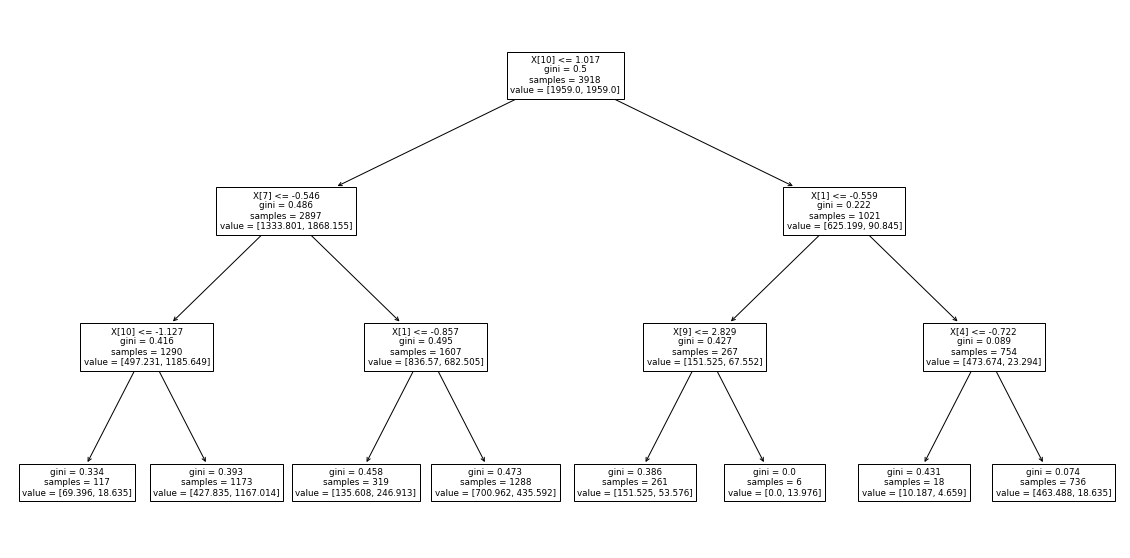

In [53]:
## Decision Tree Plot
plt.figure(figsize=(20,10))
tree.plot_tree(dtc)

In [54]:
#Let's see how our model performed
print(classification_report(y_test, dtc_prediction_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       761
           1       0.45      0.73      0.56       219

    accuracy                           0.74       980
   macro avg       0.68      0.74      0.69       980
weighted avg       0.80      0.74      0.76       980



1.   For Precision
* there are 91% Bad Wine as the prediction correctly
* there are 45% Good Win as the prediction correctly 
2.   For Recall
* there are 74% positive Bad Wine cases that were catched
* there are 73% positive Good Win cases that were catched
3. For F1-score
* there are 82% Bad Wine of positive predictions were correct
* there are 56% Good Win of positive predictions were correct
4. Accuracy is 0.74

In [55]:
#get more information on the accuracy of the model with a confusion matrix
#create the confusion matrix
cm = confusion_matrix(y_test, neighbors_predictions_test)

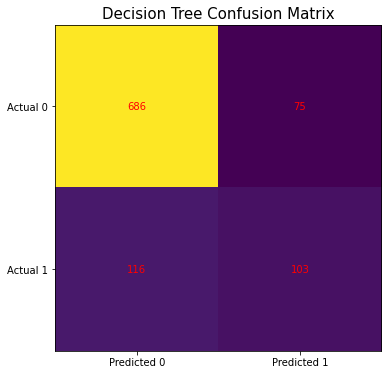

In [56]:
#visuallize the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_title('Decision Tree Confusion Matrix', fontsize=15)

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

In [57]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, dtc_prediction_test)
roc_auc_dtc = auc(fp, tp)

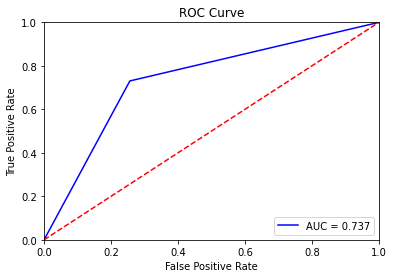

Area under the ROC curve: 0.737


In [58]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.3f'% roc_auc_dtc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = roc_auc_score(y_test, dtc_prediction_test)
print('Area under the ROC curve: {:.3f}'.format(roc_auc_dtc))

In [59]:
#find the mean of auc score
mean_auc_dtc = mean(cross_val_score(dtc,X_test,y_test, cv=10, scoring='roc_auc'))
print("The mean of Decision Tree classifier's accuracy score is: {}".format(mean_auc_dtc))


The mean of Decision Tree classifier's accuracy score is: 0.7548044217687075


## Random Forest Classifier

In [60]:
#we create a Random Forest model object
# Create parameter
parameters_RF = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2'),
    'n_estimators': [100,150,200,250,300]
}

## Create estimator
rfc = ensemble.RandomForestClassifier(n_jobs=-1)
                      
#adding GridsearchCV to define the best parameters
rfc_gridsearch = GridSearchCV(rfc, parameters_RF)

## Fit the model using training set 
rfc_gridsearch.fit(X_train,y_train)

#finding the best mode
best_frc_model = rfc_gridsearch.best_params_

In [61]:
#print the best model
best_frc_model

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 250}

In [62]:
#Prediction
rfc_predictions_test = rfc_gridsearch.predict(X_test)

#Print prediction
print("\nPredictions:",rfc_predictions_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",rfc_gridsearch.predict_proba(X_test))


Predictions: [0 0 0 0 0 0 0 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[0.932 0.068]
 [0.996 0.004]
 [0.896 0.104]
 ...
 [0.884 0.116]
 [0.82  0.18 ]
 [0.988 0.012]]


In [63]:
#test overfiting
print("Train Accuracy: {}".format(rfc_gridsearch.score(X_train, y_train)))
print("Test Accuracy: {}".format(rfc_gridsearch.score(X_test, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8612244897959184


Train and test dataset have a different R-Square. Let's adjust the model with different parameter

In [64]:
## Create estimator
rfc = ensemble.RandomForestClassifier(criterion = 'entropy', n_estimators =10)

#fit the method
rfc.fit(X_train,y_train)

#Prediction
rfc_predictions_test = rfc.predict(X_test)

#Print prediction
print("\nPredictions:",rfc_predictions_test[:10])
print("\nActual:",y_test[:10])

#returns the matrix of probabilities that the predicted output is equal to zero or one
print("\nProbabilities of the predicted output:",rfc.predict_proba(X_test))


Predictions: [0 0 0 0 0 0 0 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]

Probabilities of the predicted output: [[1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 ...
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]]


In [65]:
#test overfiting
print("Train Accuracy: {}".format(rfc.score(X_train, y_train)))
print("Test Accuracy: {}".format(rfc.score(X_test, y_test)))

Train Accuracy: 0.9887697805002552
Test Accuracy: 0.8448979591836735


Train and test dataset have the pretty similar R-square. Let's move on

In [66]:
#Let's see how our model performed
print(classification_report(y_test, rfc_predictions_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       761
           1       0.76      0.44      0.56       219

    accuracy                           0.84       980
   macro avg       0.81      0.70      0.73       980
weighted avg       0.84      0.84      0.83       980



1.   For Precision
* there are 86% Bad Wine as the prediction correctly
* there are 76% Good Win as the prediction correctly 
2.   For Recall
* there are 96% positive Bad Wine cases that were catched
* there are 44% positive Good Win cases that were catched
3. For F1-score
* there are 91% Bad Wine of positive predictions were correct
* there are 56% Good Win of positive predictions were correct
4. Accuracy is 0.84

In [67]:
#get more information on the accuracy of the model with a confusion matrix
#create the confusion matrix
cm = confusion_matrix(y_test, rfc_predictions_test)

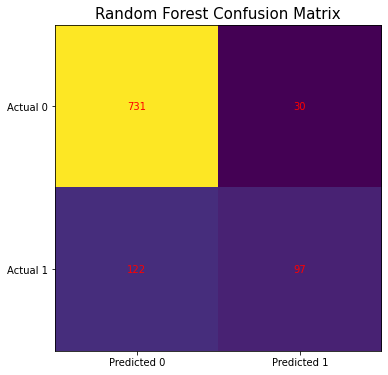

In [68]:
#visuallize the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_title('Random Forest Confusion Matrix', fontsize=15)

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

In [69]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, rfc_predictions_test)
auc = roc_auc_score(y_test, rfc_predictions_test)

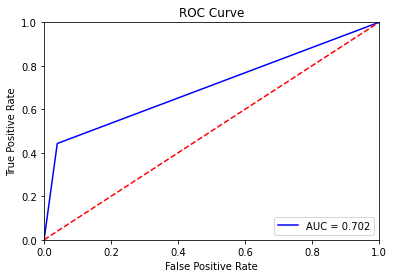

Area under the ROC curve: 0.702


In [70]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.3f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

roc_auc_rfc = roc_auc_score(y_test, rfc_predictions_test)
print('Area under the ROC curve: {:.3f}'.format(roc_auc_rfc))

In [71]:
#find the mean of auc score
mean_auc_rfc = mean(cross_val_score(rfc,X_test,y_test, cv=10, scoring='roc_auc'))
print("The mean of Random Forest classifier's accuracy score is: {}".format(mean_auc_rfc))

The mean of Random Forest classifier's accuracy score is: 0.80585371708492


## Support Vector Classifier

In [72]:
#we create a Support Vector classifier model object
#create parameter
parameters_SVC = {
    "C": [0.1, 1, 10],
    "kernel": ('linear','poly','rbf'),
    "degree": [2,4] 
    
}
## Create estimator
svc = SVC()

#adding gridsearchCV to defind the best parameter
svc_gridsearch = GridSearchCV(svc, parameters_SVC)

## Fit the model using training set 
svc_gridsearch.fit(X_train,y_train)

#finding the best parameter
best_svc_model = svc_gridsearch.best_params_

In [73]:
#Prediction
svc_predictions_test = svc_gridsearch.predict(X_test)

#Print prediction
print("\nPredictions:",svc_predictions_test[:10])
print("\nActual:",y_test[:10])



Predictions: [0 0 0 0 0 0 1 0 0 0]

Actual: [0 0 0 0 0 0 0 1 0 0]


In [74]:
#test accuracy
print("Train Accuracy is : {}".format(svc_gridsearch.score(X_train,y_train)))
print("Test Accuracy is: {}".format(svc_gridsearch.score(X_test,y_test)))

Train Accuracy is : 0.9009698825931598
Test Accuracy is: 0.8193877551020409


Train and Test dataset have almost similar R-square. Let's move on

In [75]:
#Let's see how our model performed
print(classification_report(y_test, svc_predictions_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       761
           1       0.65      0.41      0.50       219

    accuracy                           0.82       980
   macro avg       0.75      0.67      0.70       980
weighted avg       0.80      0.82      0.80       980



1.   For Precision
* there are 85% Bad Wine as the prediction correctly
* there are 65% Good Win as the prediction correctly 
2.   For Recall
* there are 94% positive Bad Wine cases that were catched
* there are 41% positive Good Win cases that were catched
3. For F1-score
* there are 89% Bad Wine of positive predictions were correct
* there are 50% Good Win of positive predictions were correct
4. Accuracy is 0.82

In [76]:
#get more information on the accuracy of the model with a confusion matrix
#create the confusion matrix
cm = confusion_matrix(y_test, svc_predictions_test)

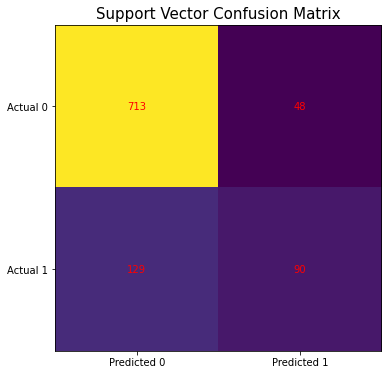

In [77]:
#visuallize the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_title('Support Vector Confusion Matrix', fontsize=15)

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

In [78]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, svc_predictions_test)
auc_svc = roc_auc_score(y_test, svc_predictions_test)

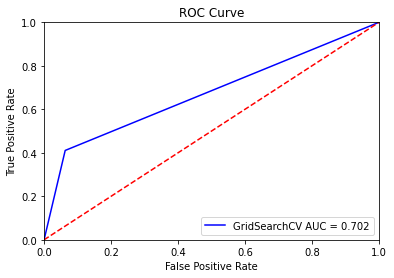

Area under the ROC curve: 0.674


In [79]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='GridSearchCV AUC = %0.3f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = roc_auc_score(y_test, svc_predictions_test)
print('Area under the ROC curve: {:.3f}'.format(auc))

In [80]:
#find the mean of auc score
mean_auc_svc = mean(cross_val_score(svc_gridsearch,X_test,y_test, cv=10, scoring='roc_auc'))
print("The mean of Support Vector classifier's accuracy score is: {}".format(mean_auc_svc))

The mean of Support Vector classifier's accuracy score is: 0.7528472154412004


# Determine the best model 

In [81]:
#create dataframe to store the auc
best_model = pd.DataFrame([['Logistic Regresion',mean_auc_log,roc_auc_log],
                          ['K Nearest Neighbor', mean_auc_knn, roc_auc_knn],
                          ['Decision Tree', mean_auc_dtc,roc_auc_dtc],
                          ['Random Forest', mean_auc_rfc,roc_auc_rfc],
                          ['Support Vector', mean_auc_svc,auc]],
                          columns = ["Classifier_Model",'Mean_Cross_val_score', 'AUC']
                          )
best_model

,Classifier_Model,Mean_Cross_val_score,AUC
0,Logistic Regresion,0.775432,0.559952
1,K Nearest Neighbor,0.711559,0.685883
2,Decision Tree,0.754804,0.737176
3,Random Forest,0.805854,0.701750
4,Support Vector,0.752847,0.673942


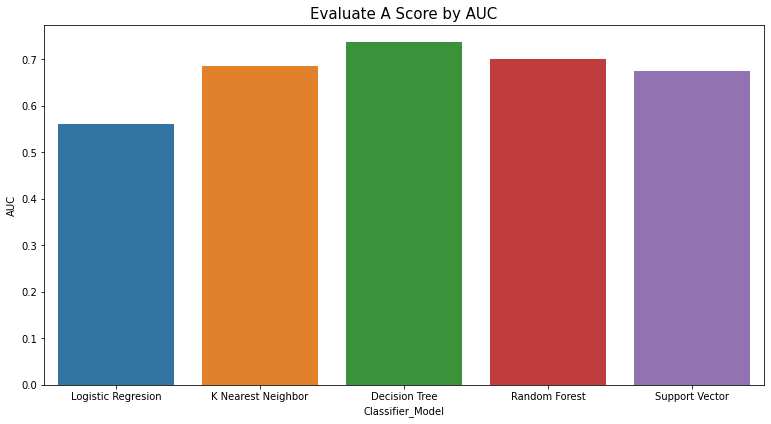

In [82]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = best_model.Classifier_Model
y = best_model.AUC
plt.title ('Evaluate A Score by AUC',fontsize=15)
sns.barplot(x=x, y=y)

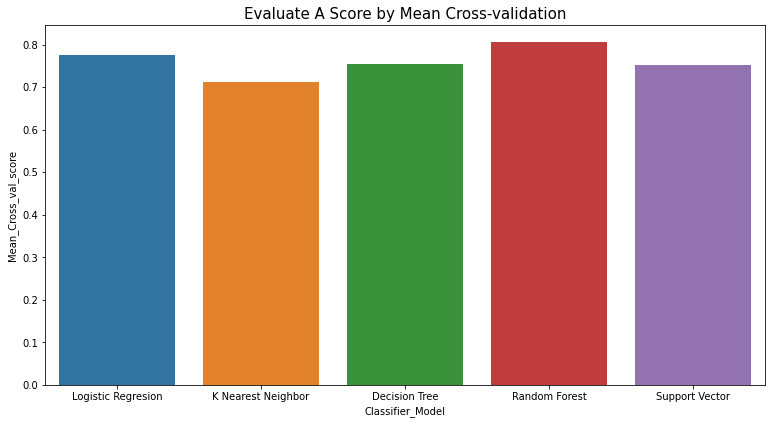

In [83]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = best_model.Classifier_Model
y = best_model.Mean_Cross_val_score
plt.title ('Evaluate A Score by Mean Cross-validation',fontsize=15)
sns.barplot(x=x, y=y)

Overall, the best model is random forest classifier with the best parameters are criterion = 'entropy', n_estimators =10